In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv
/kaggle/input/amazon-music-reviews/Musical_Instruments_5.json


In [2]:
data=pd.read_csv('../input/amazon-music-reviews/Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
print('Total ratings per rating:','\n',data.overall.value_counts())

#Number of unique instrument ids
print('Number of unique instruments:',len(data.asin.unique()))
print('Number of rows:',data.shape[0])      

Total ratings per rating: 
 5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64
Number of unique instruments: 900
Number of rows: 10261


In [4]:
#combine text and summary columns
data['reviews'] = data['reviewText'] + ' ' + data['summary']
del data['reviewText'] 
del data['summary']

#rename overall to rating
data.rename(columns={'overall':'rating'},inplace=True)

In [5]:
data['reviews'].isnull().sum()

7

In [6]:
#drop rows with missing reviews
data.dropna(axis=0, inplace=True)

### Visualize Data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#look at top 20 instrument reviews
#and bottom 20 instrument reviews

top_20=data.asin.value_counts().head(20)
btm_20 = data.asin.value_counts().tail(20)

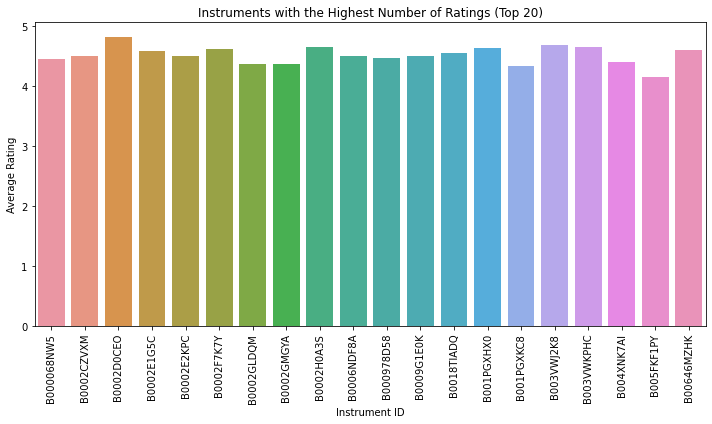

In [9]:
#Create pivot table to plot
top_20_df=pd.DataFrame()
top_20_ids=list(top_20.index)
for i in top_20_ids:
    top_20_df=top_20_df.append(data[data['asin']==i],ignore_index=True)
table = pd.pivot_table(top_20_df, values='rating',index=top_20_df['asin'],aggfunc=np.mean)

#Create Figure
plt.figure(figsize=(10,6))
sns.barplot(x=table.index, y='rating', data=table)
plt.xticks(rotation=90)
plt.xlabel('Instrument ID')
plt.ylabel('Average Rating')
plt.title('Instruments with the Highest Number of Ratings (Top 20)')
plt.tight_layout()
plt.show()

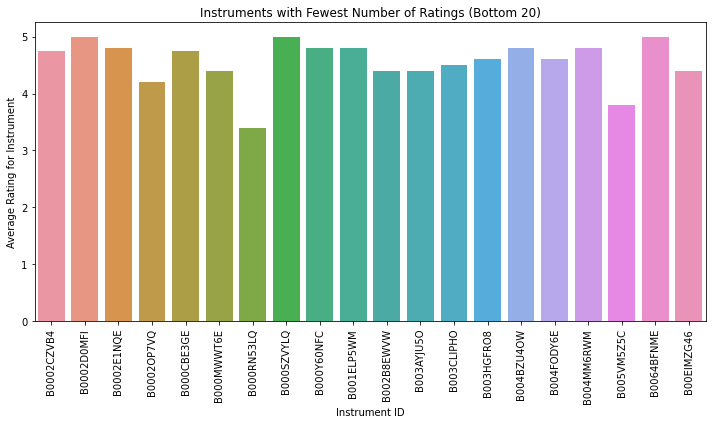

In [10]:
#Plot ave rating for 20 Instruments with lower number of ratings
btm_20_df=pd.DataFrame()
btm_20_ids=list(btm_20.index)
for i in btm_20_ids:
    btm_20_df=btm_20_df.append(data[data['asin']==i],ignore_index=True)
table_btm = pd.pivot_table(btm_20_df, values='rating',index=btm_20_df['asin'],aggfunc=np.mean)

plt.figure(figsize=(10,6))
sns.barplot(x=table_btm.index, y='rating', data=table_btm)
plt.xticks(rotation=90)
plt.xlabel('Instrument ID')
plt.ylabel('Average Rating for Instrument')
plt.title('Instruments with Fewest Number of Ratings (Bottom 20)')
plt.tight_layout()
plt.show()

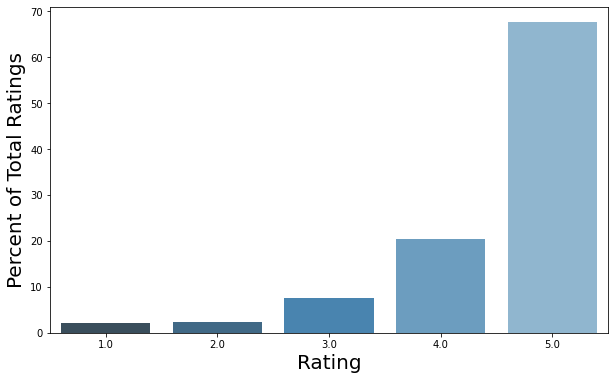

In [11]:
#Plot ratings percentages
t=pd.DataFrame(data=data['rating'].value_counts(normalize=True)*100)
plt.figure(figsize=(10,6))
sns.barplot(x=t.index, y=t.rating,palette="Blues_d")
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Percent of Total Ratings',fontsize=20)
plt.show()

There are very few low ratings. The majority of ratings are 5 stars

### Process Data for Training

In [12]:
#drop columns not using for analysis
col_to_drop=['reviewerID','asin','reviewerName','helpful','unixReviewTime','reviewTime']
instrument_reviews=data.drop(columns=col_to_drop, axis=1)
instrument_reviews.head()

,rating,reviews
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


In [13]:
#Create sentiment column 
instrument_reviews['sentiment'] = instrument_reviews['rating'].map({5:2,4:2,3:1,2:0,1:0})   
instrument_reviews.head()

,rating,reviews,sentiment
0,5.0,"Not much to write about here, but it does exac...",2
1,5.0,The product does exactly as it should and is q...,2
2,5.0,The primary job of this device is to block the...,2
3,5.0,Nice windscreen protects my MXL mic and preven...,2
4,5.0,This pop filter is great. It looks and perform...,2


In [16]:
instrument_reviews.sentiment.value_counts(normalize=True)*100

2    87.914344
1     7.538868
0     4.546788
Name: sentiment, dtype: float64

There are 88% positive reviews and only 4.5% with negative reviews.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


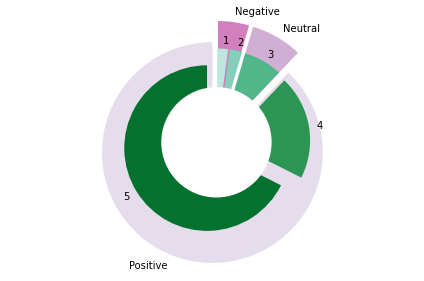

In [21]:
# Data to plot
labels=['Positive','Neutral','Negative']
sizes = [instrument_reviews['sentiment'].value_counts(normalize=True)]
labels_rating = ['5','4','3','2','1']
sizes_rating = [instrument_reviews['rating'].value_counts(normalize=True)]
#colors = ['olive','lightcoral']
#colors_rating = ['blue','cyan', 'purple','gray']
colors_rating=sns.color_palette("BuGn_r")
colors=sns.color_palette("PuRd")
explode = (0.1,0.1,0.1) 
explode_ratings = (0.1,0.1,0.1,0.1,0.1)

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,explode=explode)
plt.pie(sizes_rating,labels=labels_rating,colors=colors_rating,radius=0.75,startangle=90,explode=explode_ratings)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

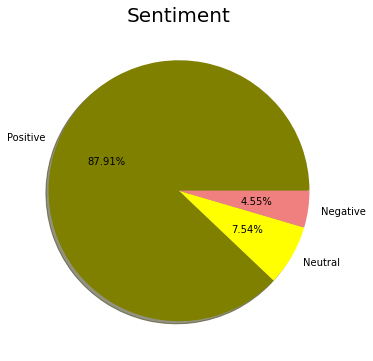

In [25]:
plt.figure(figsize=(10,6))
colors=['olive','yellow','lightcoral']
 
plt.pie(instrument_reviews['sentiment'].value_counts(normalize=True),colors=colors,labels=['Positive','Neutral','Negative'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment',fontsize=20)

plt.show()

 ### Process Data for Training and Explore Words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

#import models to test
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#import metrics
from sklearn.metrics import accuracy_score, classification_report

import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

In [27]:
#Splitting into train and valid
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(instrument_reviews['reviews'], instrument_reviews['sentiment'], random_state=42, test_size=0.3)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_valid.shape)

Training Data Shape: (7158,)
Testing Data Shape: (3069,)


In [28]:
#Define functions to clean and tokenize data
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”",".",""]

class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):    
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]

    return tokens

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
#Create string of Positive, Neutral, Negative words for Wordcloud
pos = X_train[y_train[y_train == 2].index]
neut = X_train[y_train[y_train == 1].index]
neg = X_train[y_train[y_train == 0].index]

X_train.shape,pos.shape,neut.shape,neg.shape

((7158,), (6289,), (535,), (334,))

In [30]:
#Create text for wordcloud for each sentiment
pos_words=''
for w in pos.apply(cleanText).apply(tokenizeText):
     pos_words+=" ".join(w)
print('There are {} positive words'.format(len(pos_words)))

neut_words=''
for w in neut.apply(cleanText).apply(tokenizeText):
     neut_words+=" ".join(w)
print('There are {} neutral words'.format(len(neut_words)))        

neg_words=''
for w in neg.apply(cleanText).apply(tokenizeText):
     neg_words+=" ".join(w)
print('There are {} negative words'.format(len(neg_words)))        


There are 1795979 positive words
There are 184077 neutral words
There are 106504 negative words


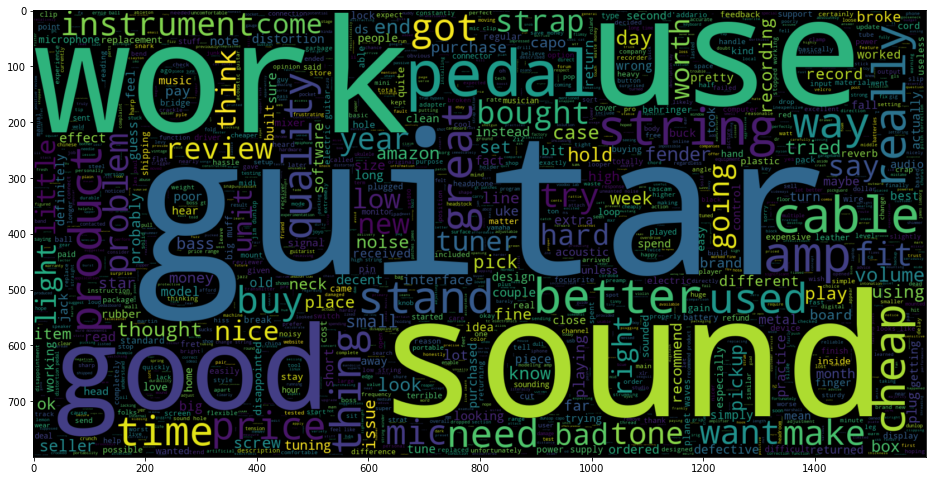

In [31]:
#Negative wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (16,16)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(neg_words)
plt.imshow(wc,interpolation = 'bilinear')
plt.show()

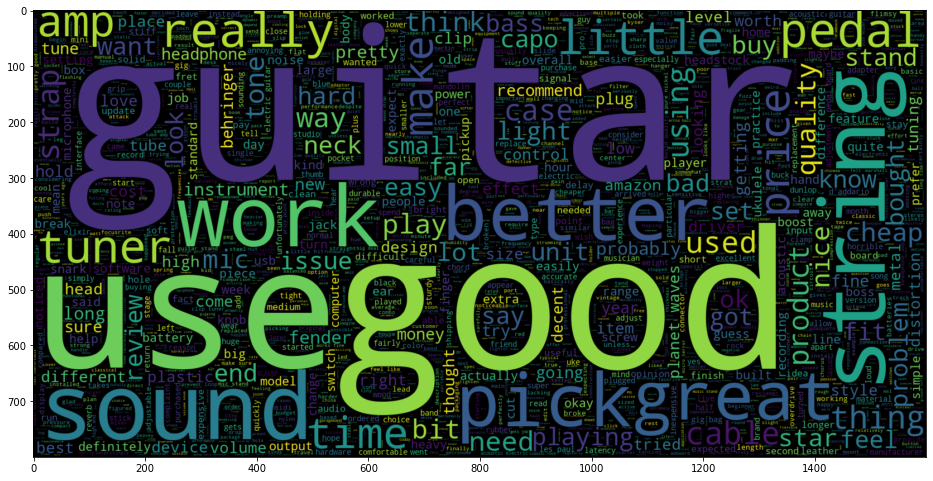

In [32]:
#Neutral wordcloud
plt.figure(figsize = (16,16)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(neut_words)
plt.imshow(wc,interpolation = 'bilinear')
plt.show()

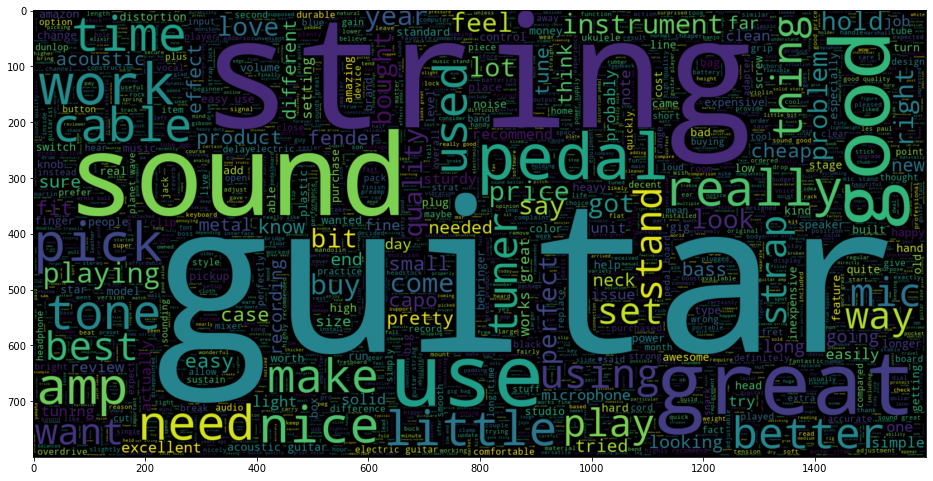

In [33]:
#Positive wordcloud
plt.figure(figsize = (16,16)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(pos_words)
plt.imshow(wc,interpolation = 'bilinear')
plt.show()

### Set Up Initial Models to Test

In [34]:
#Models to test
clf = LinearSVC(max_iter=10000)
xgb = XGBClassifier(n_estimators = 100, learning_rate=0.1)
rfc = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression(max_iter=500)
mnb = MultinomialNB()

models = [clf, xgb, rfc, lr, mnb]

In [ ]:
# def printNMostInformative(vectorizer, clf, N):
#     feature_names = vectorizer.get_feature_names()
#     coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
#     topNeg = coefs_with_fns[:N]
#     topPos = coefs_with_fns[:-(N + 1):-1]
#     print("Negative best: ")
#     for feat in topNeg:
#         print(feat)
#     print("Positive best: ")
#     for feat in topPos:
#         print(feat)
# print("Top 10 features used to predict: ")        
# printNMostInformative(vectorizer, clf, 10)
# pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
# transform = pipe.fit_transform(X_train, y_train)
# vocab = vectorizer.get_feature_names()
# for i in range(len(X_train)):
#     s = ""
#     indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
#     numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
#     for idx, num in zip(indexIntoVocab, numOccurences):
#         s += str((vocab[idx], num))

In [35]:
#Create loop to get accuracy and classification report for models
for model in models:
    
    vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
    pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_valid)
    print('model:',model,'\t',"accuracy:", accuracy_score(y_valid, preds))
    print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')


model: LinearSVC(max_iter=10000) 	 accuracy: 0.855327468230694
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.39      0.32      0.35       131
           1       0.28      0.27      0.27       236
           2       0.92      0.93      0.93      2702

    accuracy                           0.86      3069
   macro avg       0.53      0.51      0.52      3069
weighted avg       0.85      0.86      0.85      3069
 
 --------------------------------------------------
model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
         

The initial models all gace decent accuracy.  XGBClassifier had the highest accuracy of 88.7% and SVC with the lowest at 85.5%.  Next we will optimize the model to see if accuracy can be improved.

### Optimize model parameters

In [ ]:
model = XGBClassifier(subsample=0.8)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])

param_grid = { 
    'model__n_estimators': range(100,1001,300),
    'model__max_depth': [8],
    'model__learning_rate':[0.1]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(pipe, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
model = XGBClassifier(subsample=0.8)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])

param_grid = { 
    'model__n_estimators': range(100,1001,300),
    'model__max_depth': [5],
    'model__learning_rate':[0.1]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(pipe, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
model = XGBClassifier(subsample=0.8)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])

param_grid = { 
    'model__n_estimators': [700],
    'model__max_depth': [5,8],
    'model__learning_rate':[0.1,0.2]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(pipe, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
model = MultinomialNB()

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])

param_grid = { 
    'model__alpha': np.linspace(0.5,1.6,6),
    'model__fit_prior': [True, False]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(pipe, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
model = RandomForestClassifier()

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])

param_grid = { 
    'model__n_estimators': [100],
    'model__max_features': ['auto'],
    'model__max_depth' : [2,3,4],
    'model__criterion' :['gini'],
    'model__class_weight': [None]}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(pipe, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

In [ ]:
model = LogisticRegression(max_iter=500)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
# pipe.fit(X_train, y_train)
# preds = pipe.predict(X_valid)
# print("accuracy:", accuracy_score(y_valid, preds))
# print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

#
param_grid = {'model__C': (0.01,0.1,1),'model__class_weight': [None,'balanced']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(pipe, param_grid, n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

### Accuracy and Classification Report with Optimized Models

We will now rerun the optimized models and create reports.

In [36]:
####optimized models
lr_opt = LogisticRegression(max_iter=500,C=1,class_weight=None)
rf_opt = RandomForestClassifier(n_estimators=100, max_features='auto',max_depth=4,class_weight=None)
xgb_opt = XGBClassifier(subsample=0.8, learning_rate = 0.1, n_estimators = 700, max_depth = 5 )
mnb_opt = MultinomialNB(alpha = 0.72, fit_prior = False)
models_opt = [lr_opt, rf_opt, xgb_opt, mnb_opt]

In [37]:
#LogisticRegressor
model = lr_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
lr_opt_acc = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",lr_opt_acc )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')


model: LogisticRegression(C=1, max_iter=500) 	 accuracy: 0.8765070055392636
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.47      0.29      0.36       131
           1       0.32      0.20      0.25       236
           2       0.92      0.96      0.94      2702

    accuracy                           0.88      3069
   macro avg       0.57      0.48      0.52      3069
weighted avg       0.85      0.88      0.86      3069
 
 --------------------------------------------------


In [38]:
#RandomForestClassifier
model = rf_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
rf_opt_acc = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",rf_opt_acc )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: RandomForestClassifier(max_depth=4) 	 accuracy: 0.8804170739654611
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       236
           2       0.88      1.00      0.94      2702

    accuracy                           0.88      3069
   macro avg       0.29      0.33      0.31      3069
weighted avg       0.78      0.88      0.82      3069
 
 --------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#XGBClassifier
model = xgb_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
xgb_opt_acc = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",xgb_opt_acc )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None) 	 accuracy: 0.8931247963506028
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.61      0.21      0.31       131
           1       0.52      0.18      0.26       236
           2       0.91      0.99      0.95      2702

    accuracy                           0.89   

In [40]:
#MultinomialNB
model = mnb_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
mnb_opt_acc = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",mnb_opt_acc )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: MultinomialNB(alpha=0.72, fit_prior=False) 	 accuracy: 0.8813945910720105
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.60      0.05      0.09       131
           1       0.37      0.06      0.10       236
           2       0.89      0.99      0.94      2702

    accuracy                           0.88      3069
   macro avg       0.62      0.37      0.38      3069
weighted avg       0.84      0.88      0.84      3069
 
 --------------------------------------------------


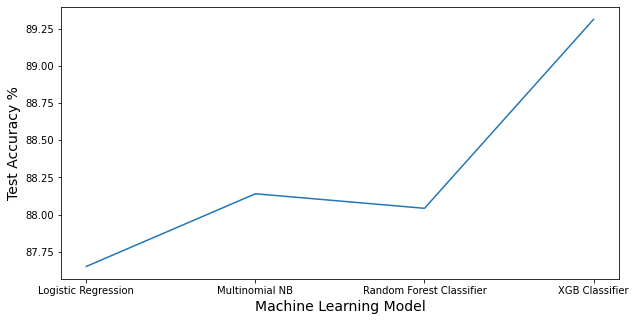

In [41]:
model_name = ['Logistic Regression', 'Random Forest Classifier', 'XGB Classifier', 'Multinomial NB']
accuracy = [lr_opt_acc*100, rf_opt_acc*100,xgb_opt_acc*100,mnb_opt_acc*100]

plt.figure(figsize=(10,5))

plt.ylabel("Test Accuracy %",fontsize=14)
plt.xlabel("Machine Learning Model",fontsize=14)
sns.lineplot(x= model_name, y= accuracy)
plt.show()

XGBClassifier remain the model with the highest accuracy and it increased from 88.7% to 89.3%

### Filter Text and Test Models
Filtering out words that appear in most frequent list for all sentiments or words that may not be applicable to sentiment such as 's to see if it improves accuracy.

In [42]:
##Find top 15 most frequent words in the text for each sentiment
import itertools
import collections
d=pos.apply(cleanText).apply(tokenizeText)

# List of all positive words 
pos_list = list(itertools.chain(*d))

# Create counter
counts_pos = collections.Counter(pos_list)
print('Most common positive words:')
items, counts = zip(*counts_pos.most_common(15))
pd.Series(counts, index=items)
pd.Series(counts, index=items).to_frame()

Most common positive words:


,0
great,3885
's,3752
guitar,3745
good,3010
like,2503
use,2353
strings,2332
sound,2304
pedal,1784
price,1636


In [43]:
d=neut.apply(cleanText).apply(tokenizeText)
# List of all neutral words
neut_list = list(itertools.chain(*d))

# Create counter
counts_neut = collections.Counter(neut_list)

print('Most common neutral words:')
items, counts = zip(*counts_neut.most_common(15))
pd.Series(counts, index=items)
pd.Series(counts, index=items).to_frame()      

Most common neutral words:


,0
's,507
guitar,320
good,309
like,266
use,246
sound,190
better,164
great,160
strings,157
really,153


In [44]:
d=neg.apply(cleanText).apply(tokenizeText)
# List of all negative words
neg_list = list(itertools.chain(*d))

# Create counter
counts_neg = collections.Counter(neg_list)

print('Most common negative words:')
items, counts = zip(*counts_neg.most_common(15))
pd.Series(counts, index=items)
pd.Series(counts, index=items).to_frame() 

Most common negative words:


,0
's,248
guitar,182
like,147
sound,113
use,109
good,108
work,96
better,93
amp,82
really,79


In [45]:
#Define functions to clean and tokenize data adding list of words to remove
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”",".",""]
REM = ["guitar","string","strings","amp","pedal","\'s"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):    
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    tokens = [tok for tok in tokens if tok not in REM]
    return tokens

In [46]:
#Splitting into train and valid
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(instrument_reviews['reviews'], instrument_reviews['sentiment'], random_state=42, test_size=0.3)
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape:', X_valid.shape)

Training Data Shape: (7158,)
Testing Data Shape: (3069,)


#### Rerunning optimized models with the common words filtered out

In [47]:
#LogisticRegressor with common words removed
model = lr_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
lr_opt_acc_filtered = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",lr_opt_acc_filtered )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: LogisticRegression(C=1, max_iter=500) 	 accuracy: 0.8768328445747801
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.47      0.27      0.34       131
           1       0.34      0.21      0.26       236
           2       0.92      0.96      0.94      2702

    accuracy                           0.88      3069
   macro avg       0.57      0.48      0.51      3069
weighted avg       0.85      0.88      0.86      3069
 
 --------------------------------------------------


In [48]:
#RandomForestClassifier
model = rf_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
rf_opt_acc_filtered = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",rf_opt_acc_filtered )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: RandomForestClassifier(max_depth=4) 	 accuracy: 0.8804170739654611
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       236
           2       0.88      1.00      0.94      2702

    accuracy                           0.88      3069
   macro avg       0.29      0.33      0.31      3069
weighted avg       0.78      0.88      0.82      3069
 
 --------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#XGBClassifier
model = xgb_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
xgb_opt_acc_filtered = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",xgb_opt_acc_filtered )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None) 	 accuracy: 0.8914956011730205
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.60      0.20      0.30       131
           1       0.50      0.18      0.27       236
           2       0.91      0.99      0.95      2702

    accuracy                           0.89   

In [50]:
#MultinomialNB
model = mnb_opt
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('model', model)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_valid)
mnb_opt_acc_filtered = accuracy_score(y_valid, preds)
print('model:',model,'\t',"accuracy:",mnb_opt_acc_filtered )
print('Classification Report','\n',50*'-','\n',classification_report(y_valid, preds),'\n',50*'-')

model: MultinomialNB(alpha=0.72, fit_prior=False) 	 accuracy: 0.8804170739654611
Classification Report 
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.67      0.05      0.09       131
           1       0.33      0.06      0.09       236
           2       0.89      0.99      0.94      2702

    accuracy                           0.88      3069
   macro avg       0.63      0.36      0.37      3069
weighted avg       0.84      0.88      0.84      3069
 
 --------------------------------------------------


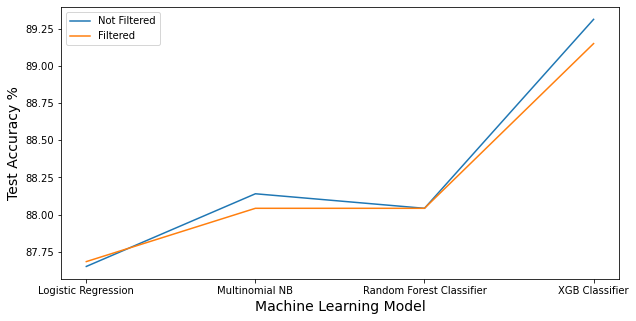

In [51]:
#plot of nonfiltered and filtered
model_name = ['Logistic Regression', 'Random Forest Classifier', 'XGB Classifier', 'Multinomial NB']
accuracy = [lr_opt_acc*100, rf_opt_acc*100,xgb_opt_acc*100,mnb_opt_acc*100]
accuracy_filtered = [lr_opt_acc_filtered*100, rf_opt_acc_filtered*100,xgb_opt_acc_filtered*100,mnb_opt_acc_filtered*100]
plt.figure(figsize=(10,5))

plt.ylabel("Test Accuracy %",fontsize=14)
plt.xlabel("Machine Learning Model",fontsize=14)
sns.lineplot(x= model_name, y= accuracy,label='Not Filtered')
sns.lineplot(x= model_name, y= accuracy_filtered,label='Filtered')
plt.show()

XGB consistently performs better with the highest accuracy of 89.3%.  Filtering out words actually lowers the accuracy of the models.  